 # Run OLS and RF models
  1. Is a good a idea consider the variables with more correlation. 
  2. I add all the variables beacuse I don't have enough knowledge of the variables. 
  3. The code is ajusted to run the model with the variable that you want (applies for RF).

## First, run a lineal model of the variables


In [7]:
import pandas as pd
import statsmodels.api as sm
from openpyxl import Workbook
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# Leer los DataFrames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',').dropna()
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',').dropna()

# Verificar las columnas de cada DataFrame
print("Variables Independientes:\n", data_frame_combinado_indep.columns)
print("Variables Dependientes:\n", data_frame_combinado_dep.columns)

Variables Independientes:
 Index(['id', 'OutDeg_Var.Expl_RedConfliAguaTot',
       'Indeg_Var.Expl_RedConfliAguaTot',
       'Out2local_Var.Expl_RedConfliAguaTot',
       'In2local_Var.Expl_RedConfliAguaTot',
       'OutBetaCent_Var.Expl_RedConfliAguaTot',
       'InBetaCent_Var.Expl_RedConfliAguaTot',
       'Out2Step_Var.Expl_RedConfliAguaTot',
       'In2Step_Var.Expl_RedConfliAguaTot', 'OutARD_Var.Expl_RedConfliAguaTot',
       ...
       'Out2Step_Var.Explic_RedeEmprestParcel',
       'In2Step_Var.Explic_RedeEmprestParcel',
       'OutARD_Var.Explic_RedeEmprestParcel',
       'InARD_Var.Explic_RedeEmprestParcel',
       'OutClose_Var.Explic_RedeEmprestParcel',
       'InClose_Var.Explic_RedeEmprestParcel',
       'Between_Var.Explic_RedeEmprestParcel',
       '2StepBet_Var.Explic_RedeEmprestParcel',
       'Frag_Var.Explic_RedeEmprestParcel',
       'DwFrag_Var.Explic_RedeEmprestParcel'],
      dtype='object', length=203)
Variables Dependientes:
 Index(['id', 'Degree_Rede_Entreaju

In [2]:
data_frame_combinado_dep.head()

,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu,Ha_Total_Superf_NumZonas,N_Zonas_Superf_NumZonas
0,Aiace Quior,7,0.016946,7,7,251,0.000000,0,0,-0.000401,...,1.5,0.0,511,516,0,0,0.000050,0.000029,2.3644,7
1,Alamada Bia,2,0.003419,2,2,256,0.000000,0,0,-0.001006,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,0.5087,1
2,Alanghate Mfumba,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,1.4640,4
3,Albat Calabus,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,1.5186,2
4,Americano Mbunde,19,29.068657,19,19,239,0.223607,0,0,0.001053,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,0.2500,1


In [3]:
data_frame_combinado_indep.head(130)

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
1,Alamada Bia,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
2,Alanghate Mfumba,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
3,Albat Calabus,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
4,Americano Mbunde,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Vieira Bedugle,3,3,3,3,45.033321,43.878429,3,3,3.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
126,Viriato Quintunda,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,2,0.0,2.0,516,510,0,0,0.000083,0.000085
127,Wangna Ntchoba,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
128,Wilndan Tchuda,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,1,0.0,1.0,516,513,0,0,0.000022,0.000024


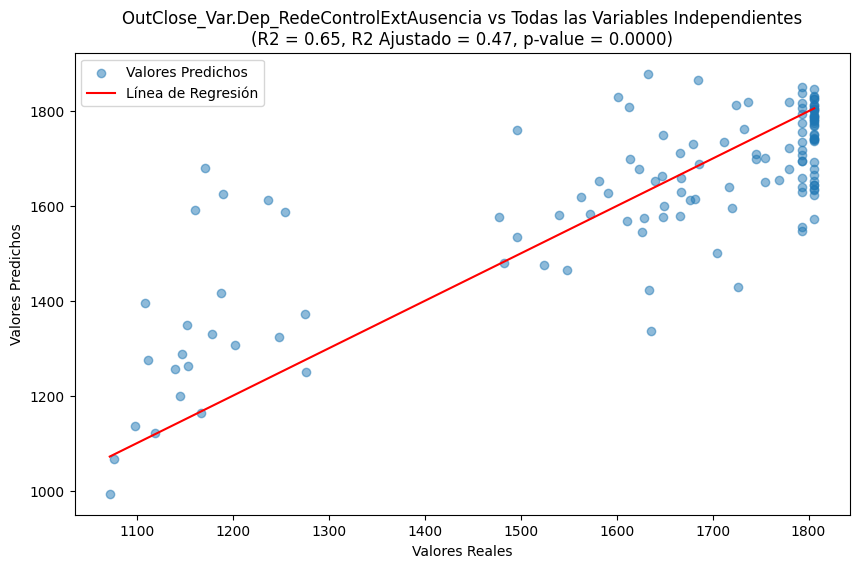

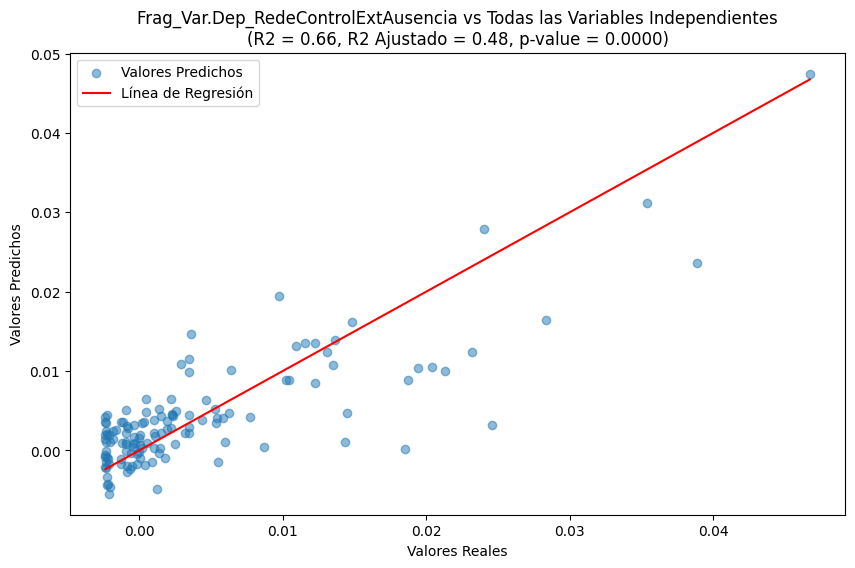

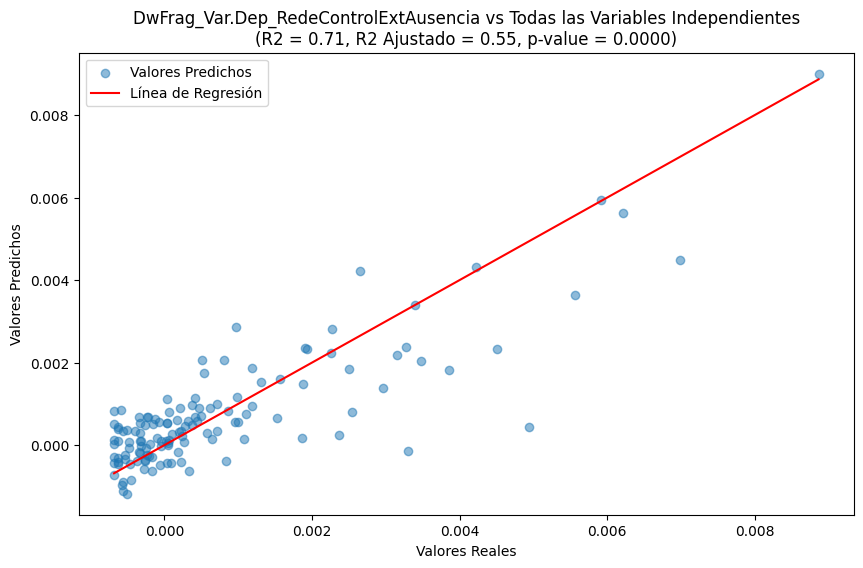

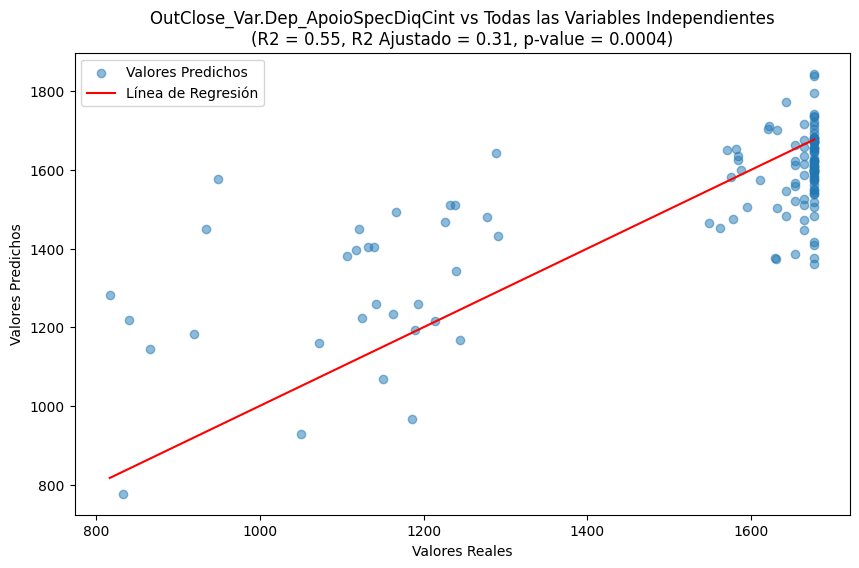

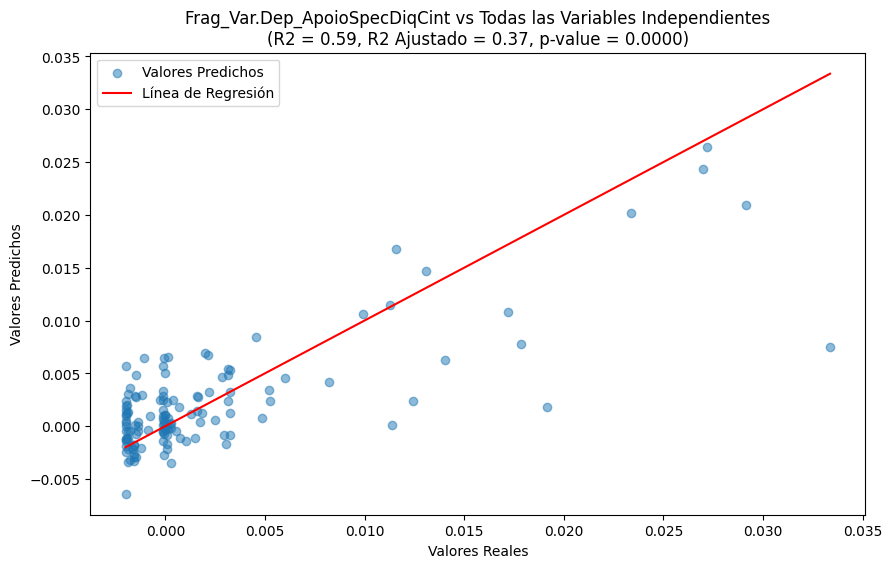

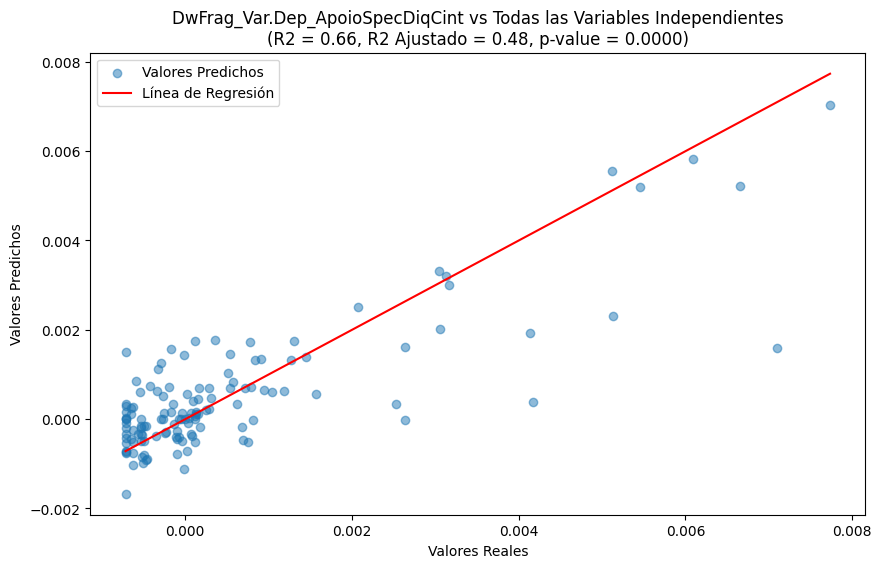

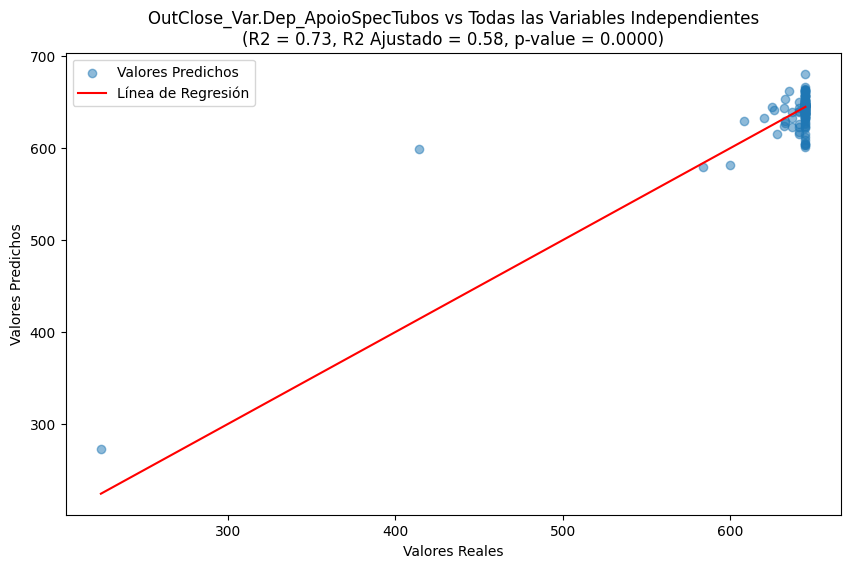

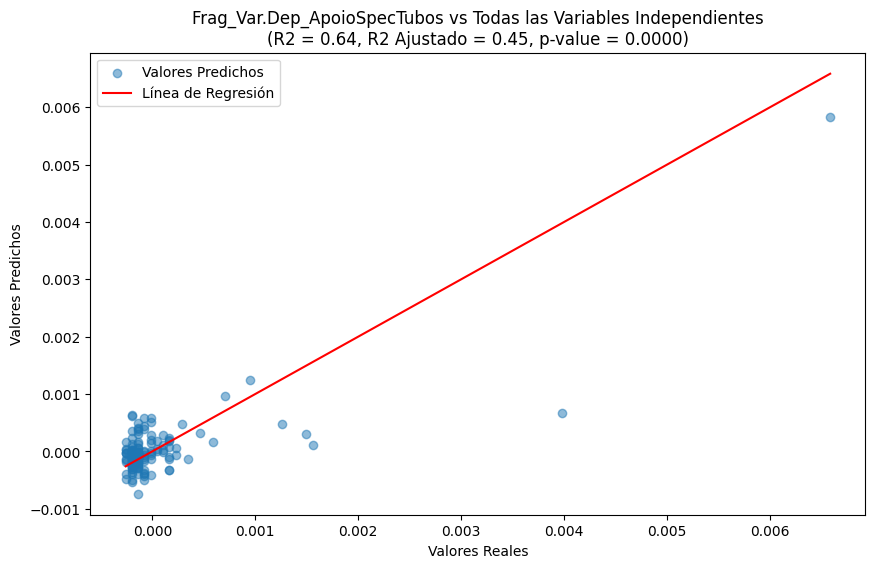

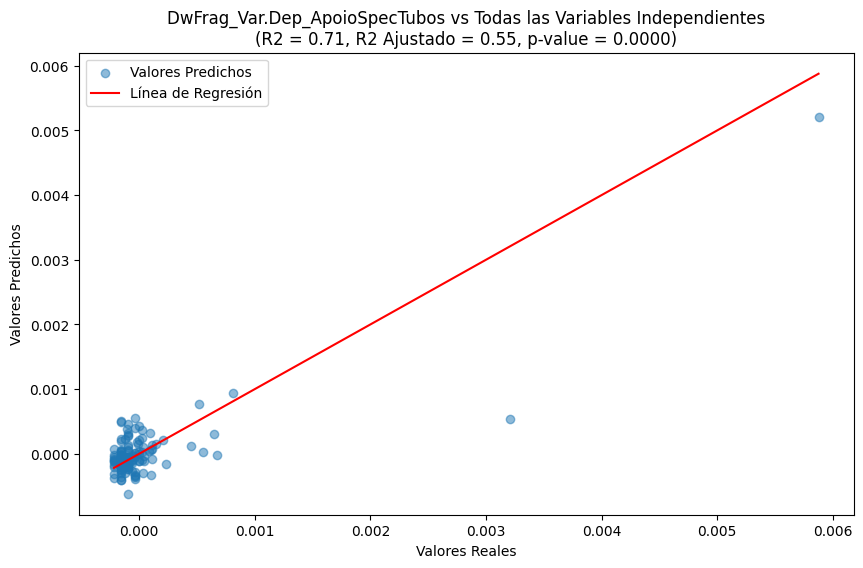

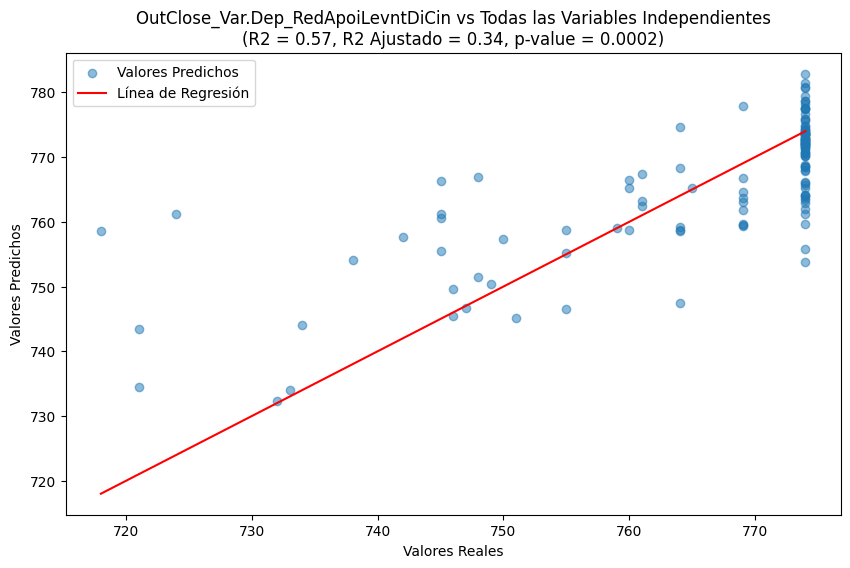

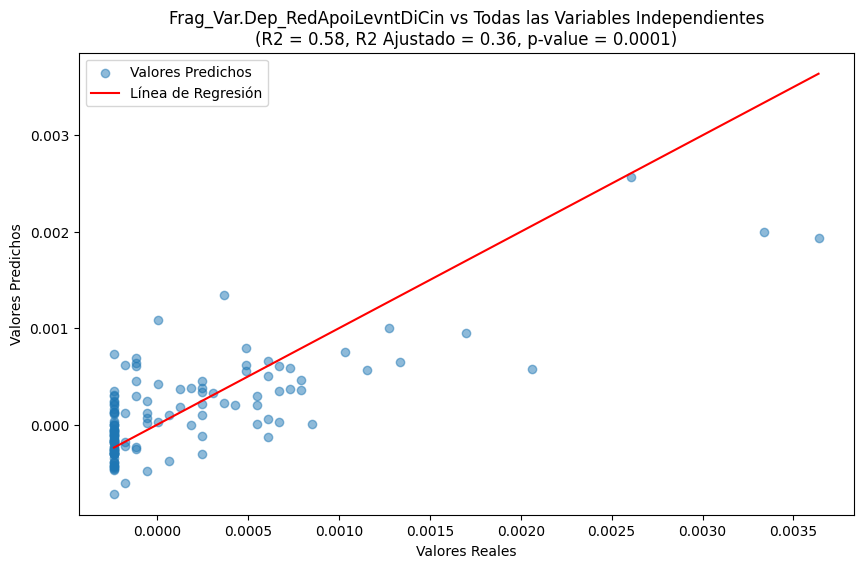

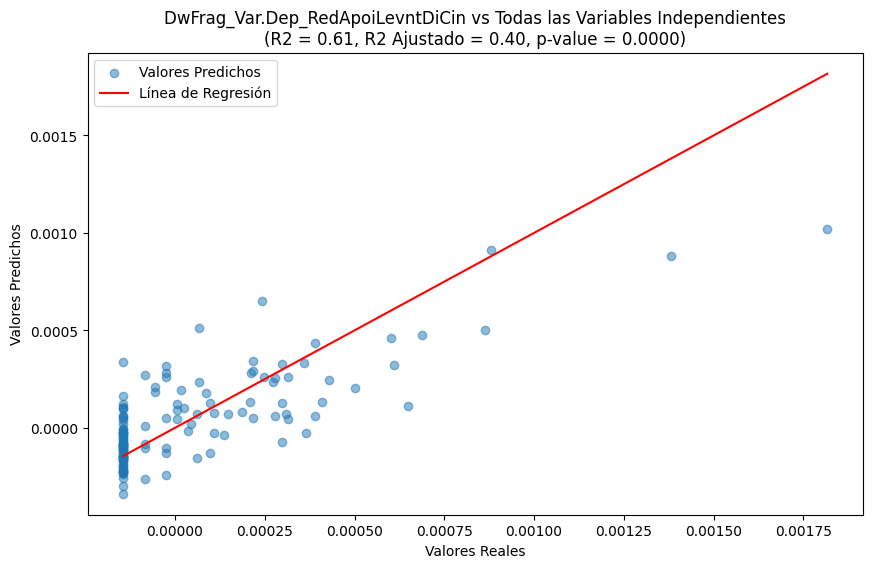

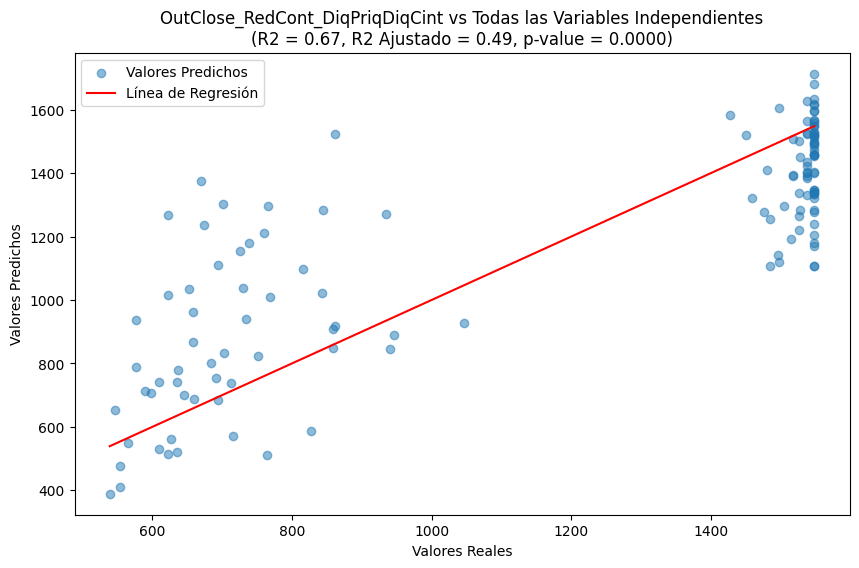

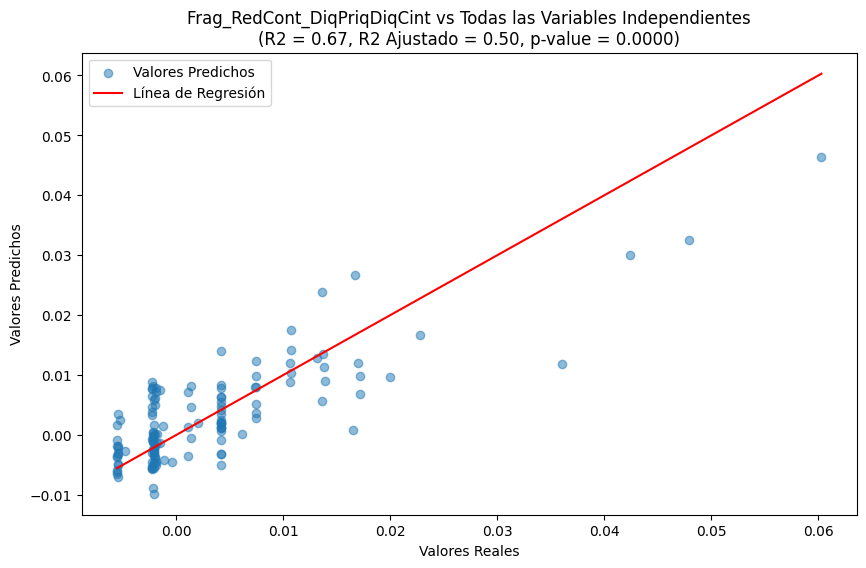

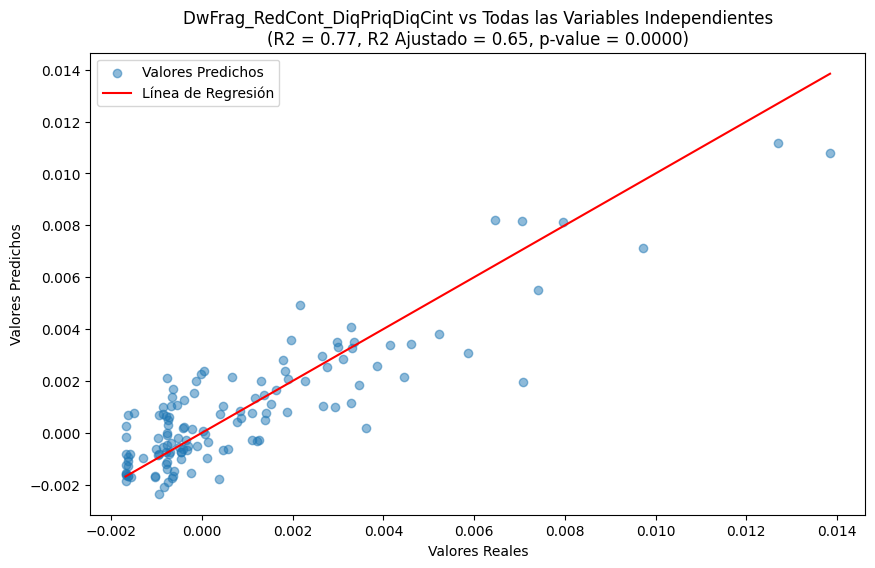

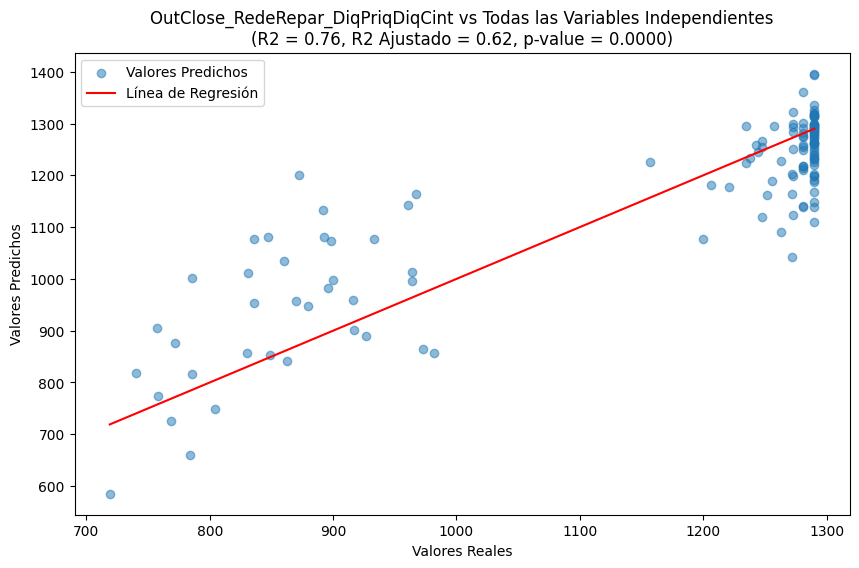

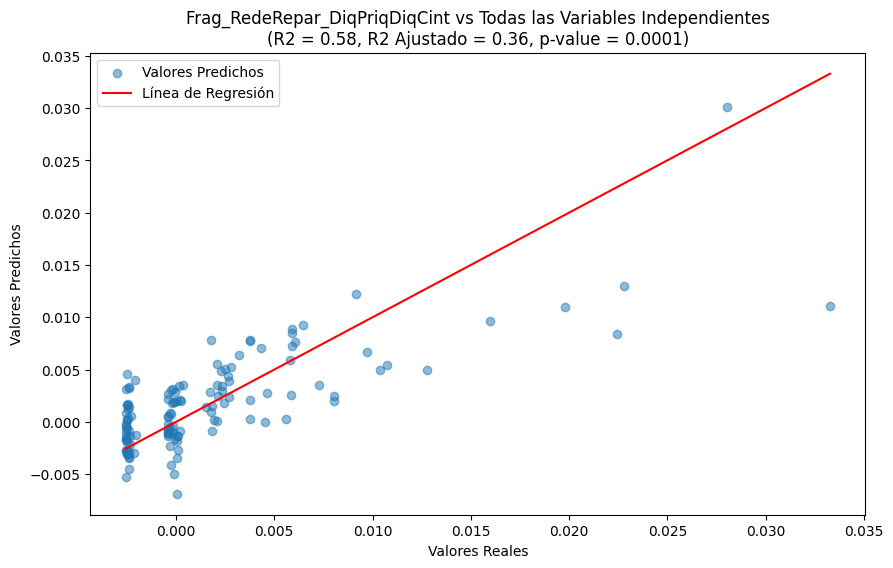

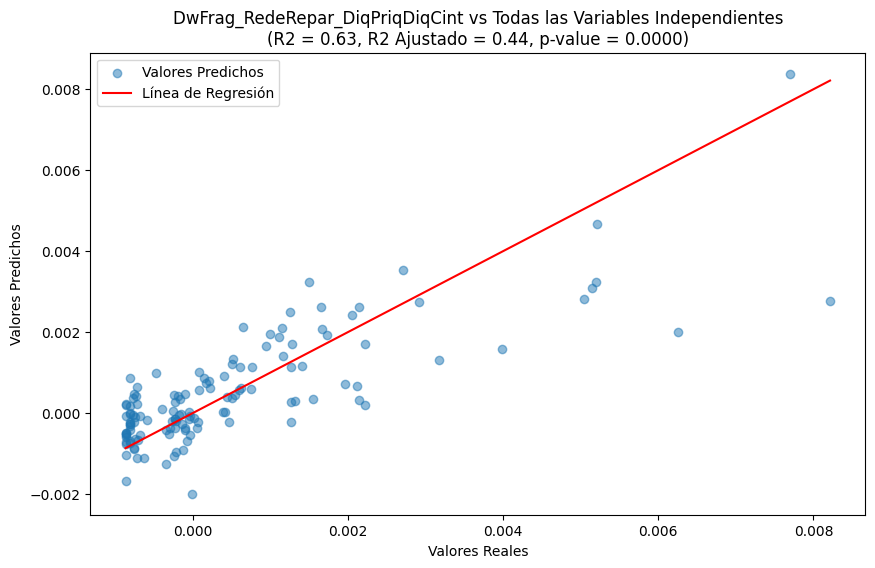

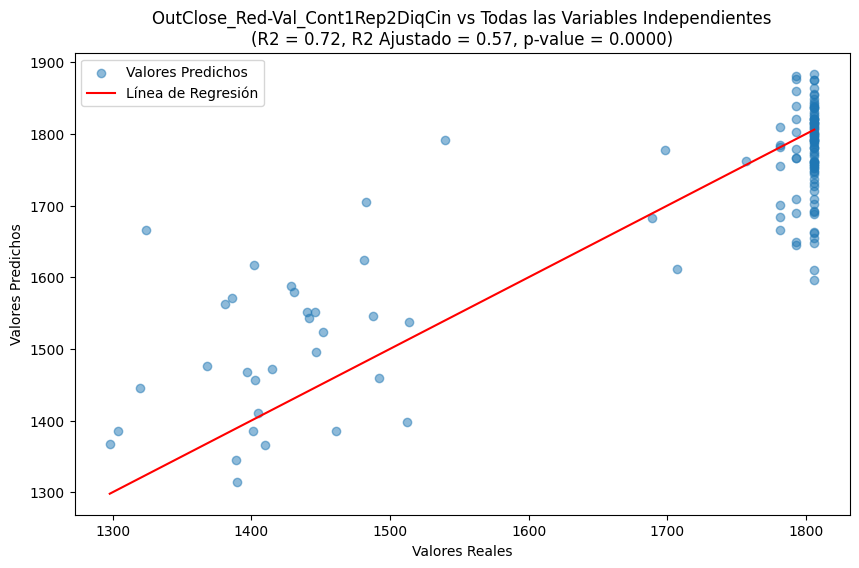

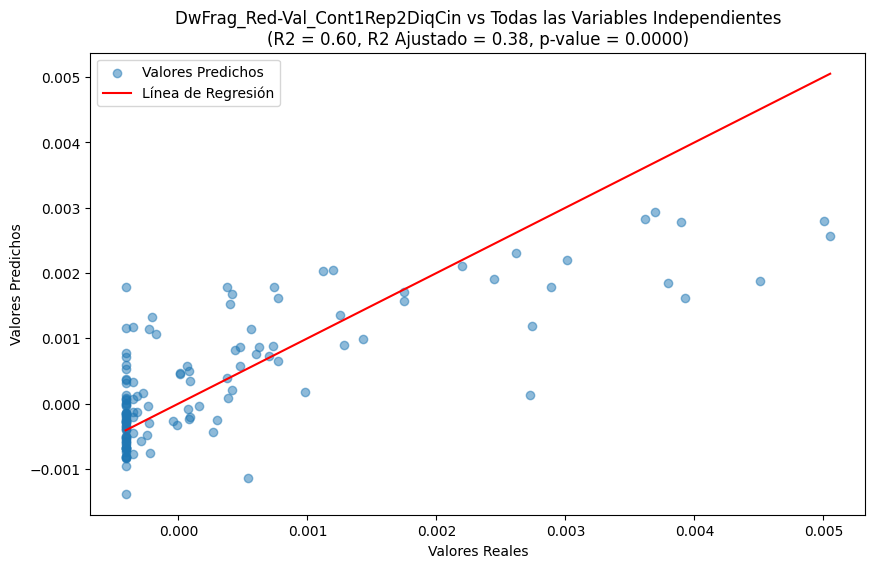

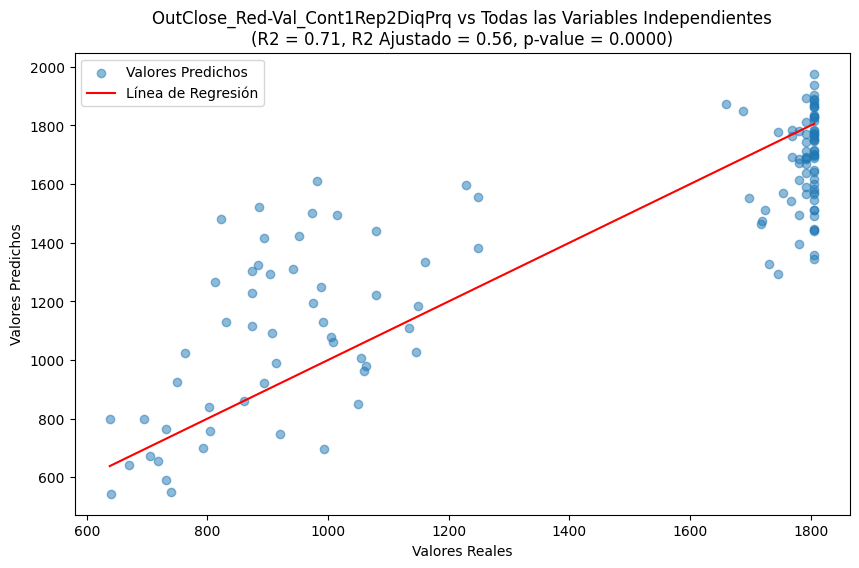

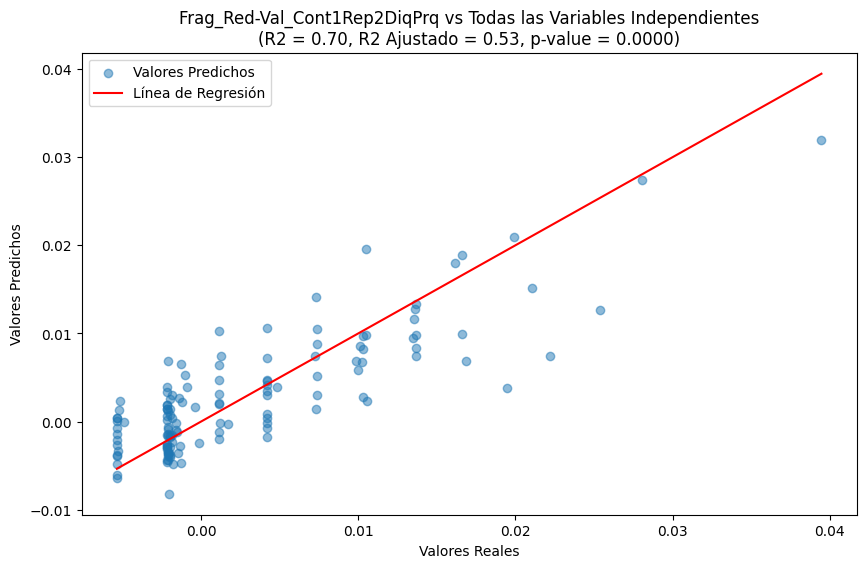

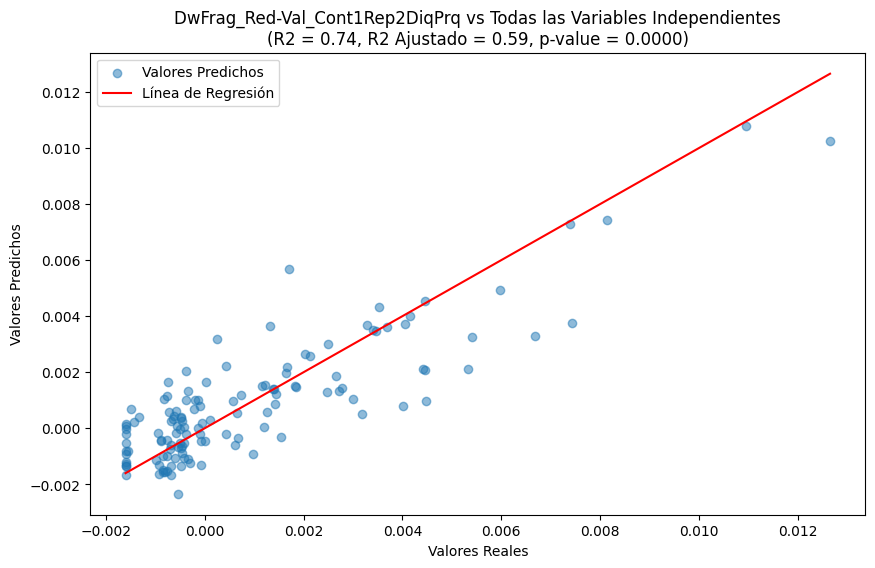

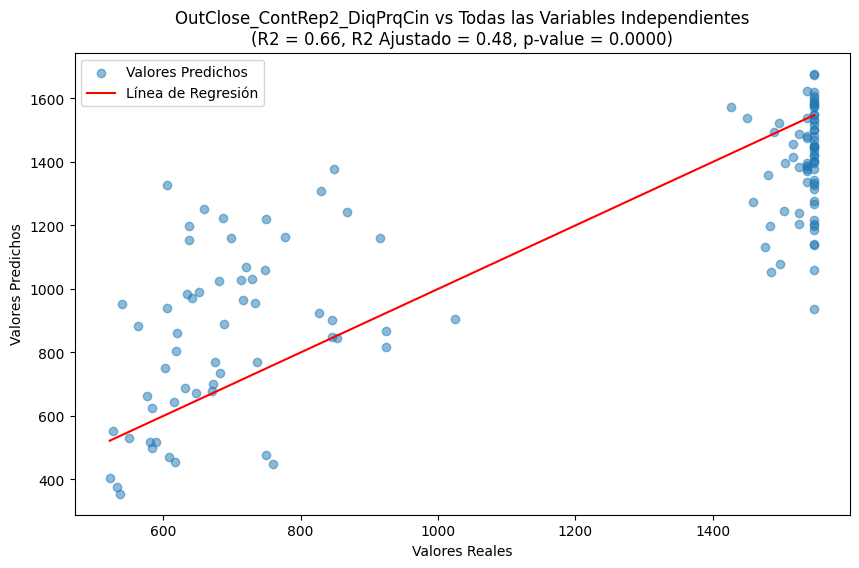

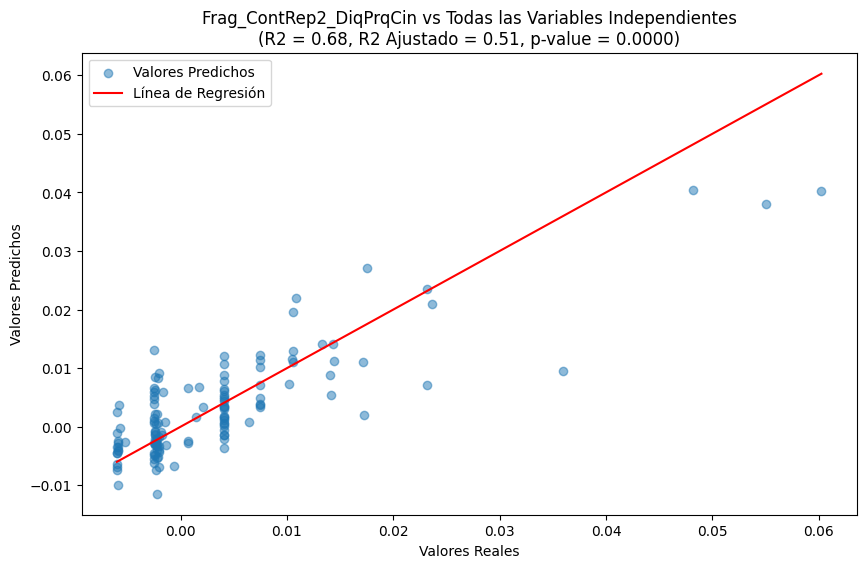

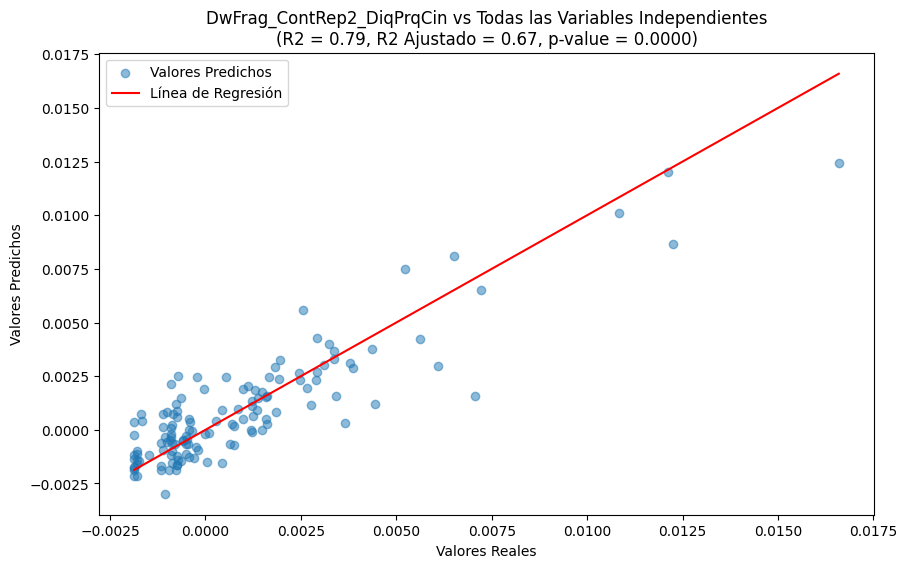

In [18]:
# Eliminar las columnas de ambos dataframes que contienen ceros en alguna fila
filtered_indep_vars = data_frame_combinado_indep.loc[:, (data_frame_combinado_indep != 0).all(axis=0)]
filtered_dep_vars = data_frame_combinado_dep.loc[:, (data_frame_combinado_dep != 0).all(axis=0)]

# Asegurarse de que la columna 'id' esté presente si fue eliminada
if 'id' in data_frame_combinado_indep.columns and 'id' not in filtered_indep_vars.columns:
    filtered_indep_vars['id'] = data_frame_combinado_indep['id']

if 'id' in data_frame_combinado_dep.columns and 'id' not in filtered_dep_vars.columns:
    filtered_dep_vars['id'] = data_frame_combinado_dep['id']

# Seleccionar todas las variables independientes
independent_vars = filtered_indep_vars.drop(columns=['id'])

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(independent_vars)

# Diccionarios para almacenar los resultados
r2_scores = {}
adjusted_r2_scores = {}
p_values = {}

# Iterar sobre cada variable dependiente filtrada
for dependent_var in filtered_dep_vars.columns:
    if dependent_var != 'id':
        y = filtered_dep_vars[dependent_var]
        
        # Realizar la regresión OLS
        model = sm.OLS(y, X).fit()
        
        # Verificar si el R2 ajustado es válido
        if model.rsquared_adj != float('-inf') and not pd.isna(model.rsquared_adj):
            # Almacenar el R2, R2 ajustado y los p-values
            r2_scores[dependent_var] = model.rsquared
            adjusted_r2_scores[dependent_var] = model.rsquared_adj
            p_values[dependent_var] = model.pvalues

# Convertir los diccionarios a dataframes
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Variable Dependiente', 'R2'])
adjusted_r2_df = pd.DataFrame(list(adjusted_r2_scores.items()), columns=['Variable Dependiente', 'R2 Ajustado'])
p_values_df = pd.DataFrame(p_values).transpose()
p_values_df.reset_index(inplace=True)
p_values_df.columns = ['Variable Dependiente'] + list(p_values_df.columns[1:])

# Filtrar las variables con R2 ajustado superior a 0.30
filtered_r2_df = adjusted_r2_df[adjusted_r2_df['R2 Ajustado'] > 0.30]

# Crear un directorio para guardar los gráficos
os.makedirs('../DataIntermediate/regression_plots', exist_ok=True)

# Generar scatter plots para las regresiones con R2 Ajustado > 0.30
for dependent_var in filtered_r2_df['Variable Dependiente']:
    y = filtered_dep_vars[dependent_var]
    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5, label='Valores Predichos')
    
    # Añadir línea de regresión
    min_y = min(y)
    max_y = max(y)
    plt.plot([min_y, max_y], [min_y, max_y], color='red', label='Línea de Regresión')  # Línea de regresión
    
    plt.title(f'{dependent_var} vs Todas las Variables Independientes\n(R2 = {model.rsquared:.2f}, R2 Ajustado = {model.rsquared_adj:.2f}, p-value = {model.f_pvalue:.4f})')
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.legend()
    plt.grid(False)
    # plt.savefig(f'../DataIntermediate/regression_plots/regresion_{dependent_var}.png')  # Guardar los plots
    plt.show()

# Crear un nuevo libro de trabajo de Excel
wb = Workbook()

# Hoja para R2
ws_r2 = wb.active
ws_r2.title = "R2"
for idx, row in r2_df.iterrows():
    ws_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_r2.cell(row=idx + 1, column=2, value=row['R2'])

# Hoja para R2 Ajustado
ws_adjusted_r2 = wb.create_sheet(title="R2 Ajustado")
for idx, row in adjusted_r2_df.iterrows():
    ws_adjusted_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_adjusted_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Hoja para p-values
ws_pvalues = wb.create_sheet(title="P-Values")
for idx, row in p_values_df.iterrows():
    for col_idx, value in enumerate(row):
        ws_pvalues.cell(row=idx + 1, column=col_idx + 1, value=value)

# Hoja para las regresiones con R2 Ajustado > 0.30
ws_filtered_r2 = wb.create_sheet(title="Regresiones con R2 > 0.30")
for idx, row in filtered_r2_df.iterrows():
    ws_filtered_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_filtered_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Guardar el archivo Excel
wb.save('../DataIntermediate/resultados_regresiones.xlsx')


In [20]:
r2_df.head()

,Variable Dependiente,R2
0,Closeness_Rede_EntreajudaLabur,0.443271
1,Frag_Rede_EntreajudaLabur,0.443271
2,DwFrag_Rede_EntreajudaLabur,0.443271
3,OutClose_Var.Dep_RedeControlExtAusencia,0.653392
4,InClose_Var.Dep_RedeControlExtAusencia,0.403549


In [19]:
# Guardar los dataframes creados que no contienen columnas con valores 0.
filtered_indep_vars.to_csv('../DataIntermediate/indep_var_filtered.csv')
filtered_dep_vars.to_csv('../DataIntermediate/dep_var_filtered.csv')
